<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
# Start Here
import numpy as np
import gensim
import os
import re
from ast import literal_eval

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd
import tqdm

In [2]:
amazon = pd.read_csv('./data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_products_May19.csv')

In [3]:
pd.set_option('display.max_columns', None)
df = amazon[['reviews.text', 'reviews.rating']]
df.head()

,reviews.text,reviews.rating
0,I order 3 of them and one of the item is bad q...,3
1,Bulk is always the less expensive way to go fo...,4
2,Well they are not Duracell but for the price i...,5
3,Seem to work as well as name brand batteries a...,5
4,These batteries are very long lasting the pric...,5


In [4]:
df.shape

(28332, 2)

In [5]:
stop_words = [
    'product',
    'review',
    'toy',
    'toys',
    'battery',
    'tablet'
]

import spacy
nlp = spacy.load('en_core_web_lg')

In [6]:
stops = nlp.Defaults.stop_words.union(stop_words)

In [7]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [8]:
df['keywords'] = df['reviews.text'].apply(tokenize)

C:\Users\xpand\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df['keywords'][2]

['well',
 'they',
 'are',
 'not',
 'duracell',
 'but',
 'for',
 'the',
 'price',
 'i',
 'am',
 'happy']

In [10]:
def remove_stops(_list_):
    
    keywords = []
    
    for keyword in _list_:
        
        phrase = []
        
        words = keyword.split()
        
        for word in words:
            if word in stops:
                pass
            else: 
                phrase.append(word)
            
        phrase = ' '.join(phrase)
        
        if len(phrase) > 0:
            keywords.append(phrase)
    
    return keywords
    

In [11]:
from tqdm import tqdm

tqdm.pandas()

df['clean_keywords'] = df['keywords'].progress_apply(remove_stops)

C:\Users\xpand\anaconda3\envs\U4-S1-NLP\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|█████████████████████████████████████████████████████████████████████████| 28332/28332 [00:00<00:00, 87708.32it/s]
C:\Users\xpand\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [12]:
df['clean_keywords'][765]

['arent',
 'greatest',
 'batteries',
 'work',
 'weve',
 'found',
 'work',
 'best',
 'computer',
 'accessories',
 'like',
 'keyboard',
 'mouse',
 'long',
 'things',
 'like',
 'remote',
 'controlled',
 'cars',
 'takes',
 'big',
 'drain',
 'short',
 'bursts',
 'like',
 'electric',
 'car',
 'motors',
 'shortens',
 'life',
 'batteries',
 'fast',
 'things',
 'use',
 'small',
 'energy',
 'long',
 'period',
 'time',
 'lot',
 'better',
 'brand',
 'batteries',
 'high',
 'drain',
 'electronics',
 'lot',
 'longer',
 'use',
 'amazon',
 'batteries',
 'low',
 'draw',
 'electronics',
 'youll',
 'moneys',
 'worthwhat',
 'ive',
 'found',
 'good',
 'keyboard',
 'mouse',
 'laser',
 'pointer',
 'small',
 'led',
 'flashlights',
 'small',
 'noise',
 'making',
 'plays',
 'music',
 'electronic',
 'beepsnot',
 'good',
 'electric',
 'motor',
 'cars',
 'pencil',
 'sharpener',
 'etcthey',
 'good',
 'value',
 'depending',
 'use',
 'power']

In [13]:
import gensim
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

In [14]:
# Dict representation of all our keywords
id2word = corpora.Dictionary(df['clean_keywords'])

In [15]:
id2word.token2id['electronics']

730

In [16]:
len(id2word.keys())

12609

In [17]:
id2word.filter_extremes(no_below=15, no_above=0.85)

In [18]:
len(id2word.keys())

1928

In [19]:
corpus = [id2word.doc2bow(text) for text in df['clean_keywords']]

In [20]:
corpus[812]

[(16, 3),
 (21, 1),
 (27, 1),
 (43, 1),
 (52, 1),
 (96, 1),
 (165, 1),
 (294, 1),
 (314, 1),
 (379, 1),
 (382, 1),
 (400, 1),
 (581, 1),
 (614, 1),
 (817, 1)]

In [21]:
id2word[77]

'longer'

In [22]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   num_topics=20,
                   passes=50, 
                   workers=12
                  )

In [23]:
lda.print_topics()

[(0,
  '0.037*"amazon" + 0.033*"sound" + 0.030*"great" + 0.027*"alexa" + 0.025*"quality" + 0.025*"music" + 0.025*"use" + 0.019*"tap" + 0.018*"want" + 0.018*"echo"'),
 (1,
  '0.204*"love" + 0.039*"bought" + 0.024*"excellent" + 0.022*"grandkids" + 0.019*"gift" + 0.019*"got" + 0.016*"kindles" + 0.016*"use" + 0.016*"color" + 0.014*"fact"'),
 (2,
  '0.074*"long" + 0.046*"batteries" + 0.023*"dont" + 0.020*"life" + 0.020*"good" + 0.019*"time" + 0.016*"duracell" + 0.016*"amazon" + 0.015*"cheap" + 0.013*"power"'),
 (3,
  '0.442*"great" + 0.098*"price" + 0.093*"works" + 0.030*"recommend" + 0.025*"value" + 0.016*"highly" + 0.016*"item" + 0.016*"deal" + 0.016*"buy" + 0.015*"work"'),
 (4,
  '0.153*"batteries" + 0.040*"work" + 0.028*"brand" + 0.020*"amazon" + 0.016*"price" + 0.016*"brands" + 0.014*"like" + 0.013*"buy" + 0.012*"long" + 0.011*"ive"'),
 (5,
  '0.098*"loves" + 0.093*"old" + 0.078*"bought" + 0.075*"year" + 0.041*"christmas" + 0.040*"gift" + 0.034*"daughter" + 0.033*"son" + 0.023*"got" + 

In [24]:
import re

words = [re.findall(r'"[^"]*"', t[1]) for t in lda.print_topics(20)]

In [25]:
topic_labels = [', '.join(t[0:5]) for t in words]

In [27]:
for id, t in enumerate(topic_labels): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
"amazon", "sound", "great", "alexa", "quality"

------ Topic 1 ------
"love", "bought", "excellent", "grandkids", "gift"

------ Topic 2 ------
"long", "batteries", "dont", "life", "good"

------ Topic 3 ------
"great", "price", "works", "recommend", "value"

------ Topic 4 ------
"batteries", "work", "brand", "amazon", "price"

------ Topic 5 ------
"loves", "old", "bought", "year", "christmas"

------ Topic 6 ------
"amazon", "store", "apps", "google", "app"

------ Topic 7 ------
"little", "far", "needs", "fine", "bit"

------ Topic 8 ------
"light", "small", "size", "screen", "kindle"

------ Topic 9 ------
"books", "reading", "read", "kindle", "book"

------ Topic 10 ------
"apps", "children", "like", "card", "memory"

------ Topic 11 ------
"ipad", "time", "charge", "dont", "free"

------ Topic 12 ------
"fire", "8", "hd", "amazon", "7"

------ Topic 13 ------
"good", "price", "best", "buy", "cant"

------ Topic 14 ------
"easy", "use", "set", "love", "navig

In [28]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [29]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

C:\Users\xpand\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.212001  0.069783       1        1  13.345564
2      0.185016  0.088073       2        1   8.169596
5     -0.234086  0.005219       3        1   6.276453
13     0.205947 -0.193840       4        1   5.735296
6      0.082242  0.100189       5        1   5.592099
3      0.097486 -0.362499       6        1   5.091176
11    -0.020125  0.144741       7        1   4.909393
19     0.017816  0.148635       8        1   4.835527
8      0.046889  0.036939       9        1   4.583172
16    -0.202553 -0.041029      10        1   4.535695
9      0.003748  0.125478      11        1   4.364968
15    -0.273112 -0.138963      12        1   4.299540
0      0.128885 -0.069591      13        1   3.984559
17    -0.077668 -0.003663      14        1   3.806350
14    -0.129633 -0.029172      15        1   3.709716
10    -0.064494 -0.022719      16        1   3.639991
18     0.079984 -0.122540      17        1   3.624313
12     0.052472  0.111785      18        1   3.500594
7      0.029203  0.105024      19        1   3.000657
1     -0.140018  0.048151      20        1   2.995342, topic_info=          Term         Freq        Total Category  logprob  loglift
19       great  8818.000000  8818.000000  Default  30.0000  30.0000
16   batteries  7046.000000  7046.000000  Default  29.0000  29.0000
661       easy  2983.000000  2983.000000  Default  28.0000  28.0000
32        good  5138.000000  5138.000000  Default  27.0000  27.0000
88         use  4458.000000  4458.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
337      right    73.185559   507.127853  Topic20  -4.7826   1.5723
88         use   140.256067  4458.271351  Topic20  -4.1322   0.0491
27         buy    98.895443  2170.594531  Topic20  -4.4816   0.4194
102       able    63.008131   581.953375  Topic20  -4.9324   1.2850
39         ive    63.268027   807.050182  Topic20  -4.9283   0.9621

[1209 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1922     16  0.698491      128
1922     18  0.253997      128
1922     20  0.031750      128
260       2  0.110815       15
260       7  0.886517       15
...     ...       ...      ...
1498     13  0.037745  youtube
1498     17  0.080881  youtube
1317      3  0.915439       yr
1317     10  0.004422       yr
1317     14  0.075181       yr

[3617 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 6, 14, 7, 4, 12, 20, 9, 17, 10, 16, 1, 18, 15, 11, 19, 13, 8, 2])

In [30]:
distro = [lda[doc] for doc in corpus]

C:\Users\xpand\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
distro[0]

C:\Users\xpand\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(4, 0.22708952), (5, 0.20465448), (6, 0.27444464), (13, 0.20490822)]

In [32]:
def update(doc):
    d_dist = {k:0 for k in range(0,20)}
    for t in doc:
        d_dist[t[0]] = t[1]
    return d_dist

new_distro = [update(doc) for doc in distro] 

C:\Users\xpand\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
topics = pd.DataFrame.from_records(new_distro)
topics.columns = topic_labels

C:\Users\xpand\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
topics.head()

C:\Users\xpand\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,"""amazon"", ""sound"", ""great"", ""alexa"", ""quality""","""love"", ""bought"", ""excellent"", ""grandkids"", ""gift""","""long"", ""batteries"", ""dont"", ""life"", ""good""","""great"", ""price"", ""works"", ""recommend"", ""value""","""batteries"", ""work"", ""brand"", ""amazon"", ""price""","""loves"", ""old"", ""bought"", ""year"", ""christmas""","""amazon"", ""store"", ""apps"", ""google"", ""app""","""little"", ""far"", ""needs"", ""fine"", ""bit""","""light"", ""small"", ""size"", ""screen"", ""kindle""","""books"", ""reading"", ""read"", ""kindle"", ""book""","""apps"", ""children"", ""like"", ""card"", ""memory""","""ipad"", ""time"", ""charge"", ""dont"", ""free""","""fire"", ""8"", ""hd"", ""amazon"", ""7""","""good"", ""price"", ""best"", ""buy"", ""cant""","""easy"", ""use"", ""set"", ""love"", ""navigate""","""kids"", ""great"", ""case"", ""friendly"", ""perfect""","""games"", ""play"", ""movies"", ""watch"", ""apps""","""tablets"", ""kids"", ""amazon"", ""amazing"", ""love""","""nice"", ""screen"", ""great"", ""size"", ""good""","""kindle"", ""fire"", ""new"", ""old"", ""love"""
0,0.0000,0.0000,0.000000,0.000000,0.227090,0.204654,0.274445,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.204908,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.000000,0.000000,0.841661,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0125,0.0125,0.307556,0.012500,0.012500,0.012500,0.012500,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.467438,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125
3,0.0000,0.0000,0.000000,0.000000,0.841666,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.512803,0.337196,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [35]:
df['primary_topic'] = topics.idxmax(axis=1)

C:\Users\xpand\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\xpand\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df.head()

C:\Users\xpand\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,reviews.text,reviews.rating,keywords,clean_keywords,primary_topic
0,I order 3 of them and one of the item is bad q...,3,"[i, order, 3, of, them, and, one, of, the, ite...","[order, 3, item, bad, quality, missing, backup...","""amazon"", ""store"", ""apps"", ""google"", ""app"""
1,Bulk is always the less expensive way to go fo...,4,"[bulk, is, always, the, less, expensive, way, ...","[bulk, expensive, way, products, like]","""batteries"", ""work"", ""brand"", ""amazon"", ""price"""
2,Well they are not Duracell but for the price i...,5,"[well, they, are, not, duracell, but, for, the...","[duracell, price, happy]","""good"", ""price"", ""best"", ""buy"", ""cant"""
3,Seem to work as well as name brand batteries a...,5,"[seem, to, work, as, well, as, name, brand, ba...","[work, brand, batteries, better, price]","""batteries"", ""work"", ""brand"", ""amazon"", ""price"""
4,These batteries are very long lasting the pric...,5,"[these, batteries, are, very, long, lasting, t...","[batteries, long, lasting, price, great]","""long"", ""batteries"", ""dont"", ""life"", ""good"""


In [37]:
df['primary_topic'].value_counts()

C:\Users\xpand\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"batteries", "work", "brand", "amazon", "price"       4746
"good", "price", "best", "buy", "cant"                2616
"long", "batteries", "dont", "life", "good"           2504
"great", "price", "works", "recommend", "value"       2384
"loves", "old", "bought", "year", "christmas"         2311
"kids", "great", "case", "friendly", "perfect"        1330
"kindle", "fire", "new", "old", "love"                1082
"games", "play", "movies", "watch", "apps"            1034
"amazon", "sound", "great", "alexa", "quality"        1023
"light", "small", "size", "screen", "kindle"          1012
"amazon", "store", "apps", "google", "app"             997
"nice", "screen", "great", "size", "good"              970
"easy", "use", "set", "love", "navigate"               964
"books", "reading", "read", "kindle", "book"           881
"ipad", "time", "charge", "dont", "free"               833
"love", "bought", "excellent", "grandkids", "gift"     830
"apps", "children", "like", "card", "memory"           7

In [51]:
agg = pd.pivot_table(df, values=['reviews.text'], 
                     index=['primary_topic'], 
                     columns=['reviews.rating'], aggfunc='count')

C:\Users\xpand\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
agg = agg.reset_index()
agg

C:\Users\xpand\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


primary_topic  \
reviews.rating                                                      
0                  "amazon", "sound", "great", "alexa", "quality"   
1                      "amazon", "store", "apps", "google", "app"   
2                    "apps", "children", "like", "card", "memory"   
3                 "batteries", "work", "brand", "amazon", "price"   
4                    "books", "reading", "read", "kindle", "book"   
5                        "easy", "use", "set", "love", "navigate"   
6                                "fire", "8", "hd", "amazon", "7"   
7                      "games", "play", "movies", "watch", "apps"   
8                          "good", "price", "best", "buy", "cant"   
9                 "great", "price", "works", "recommend", "value"   
10                       "ipad", "time", "charge", "dont", "free"   
11                 "kids", "great", "case", "friendly", "perfect"   
12                         "kindle", "fire", "new", "old", "love"   
13                   "light", "small", "size", "screen", "kindle"   
14                        "little", "far", "needs", "fine", "bit"   
15                    "long", "batteries", "dont", "life", "good"   
16              "love", "bought", "excellent", "grandkids", "g...   
17                  "loves", "old", "bought", "year", "christmas"   
18                      "nice", "screen", "great", "size", "good"   
19                 "tablets", "kids", "amazon", "amazing", "love"   

               reviews.text                               
reviews.rating            1      2      3      4       5  
0                      12.0   18.0   40.0  276.0   677.0  
1                      34.0   26.0  127.0  430.0   380.0  
2                      14.0   15.0   47.0  214.0   448.0  
3                     283.0  133.0  167.0  533.0  3630.0  
4                       7.0    7.0   21.0  243.0   603.0  
5                       1.0    NaN    8.0  237.0   718.0  
6                      10.0    9.0   29.0  137.0   472.0  
7                       3.0    9.0   33.0  255.0   734.0  
8                      16.0   10.0   52.0  553.0  1985.0  
9                       5.0    3.0   17.0  249.0  2110.0  
10                     88.0   79.0   99.0  193.0   374.0  
11                     12.0    5.0   28.0  310.0   975.0  
12                     19.0   19.0   33.0  212.0   799.0  
13                     16.0   15.0   32.0  218.0   731.0  
14                     14.0    6.0   61.0  184.0   428.0  
15                    392.0  229.0  265.0  339.0  1279.0  
16                      7.0    2.0   14.0  130.0   677.0  
17                      8.0    4.0   58.0  493.0  1748.0  
18                      1.0   12.0   40.0  242.0   675.0  
19                     23.0   15.0   35.0  200.0   454.0

In [53]:
agg.columns = ['primary_topic', '1', '2', '3', '4', '5']
agg.head()

C:\Users\xpand\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,primary_topic,1,2,3,4,5
0,"""amazon"", ""sound"", ""great"", ""alexa"", ""quality""",12.0,18.0,40.0,276.0,677.0
1,"""amazon"", ""store"", ""apps"", ""google"", ""app""",34.0,26.0,127.0,430.0,380.0
2,"""apps"", ""children"", ""like"", ""card"", ""memory""",14.0,15.0,47.0,214.0,448.0
3,"""batteries"", ""work"", ""brand"", ""amazon"", ""price""",283.0,133.0,167.0,533.0,3630.0
4,"""books"", ""reading"", ""read"", ""kindle"", ""book""",7.0,7.0,21.0,243.0,603.0


C:\Users\xpand\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


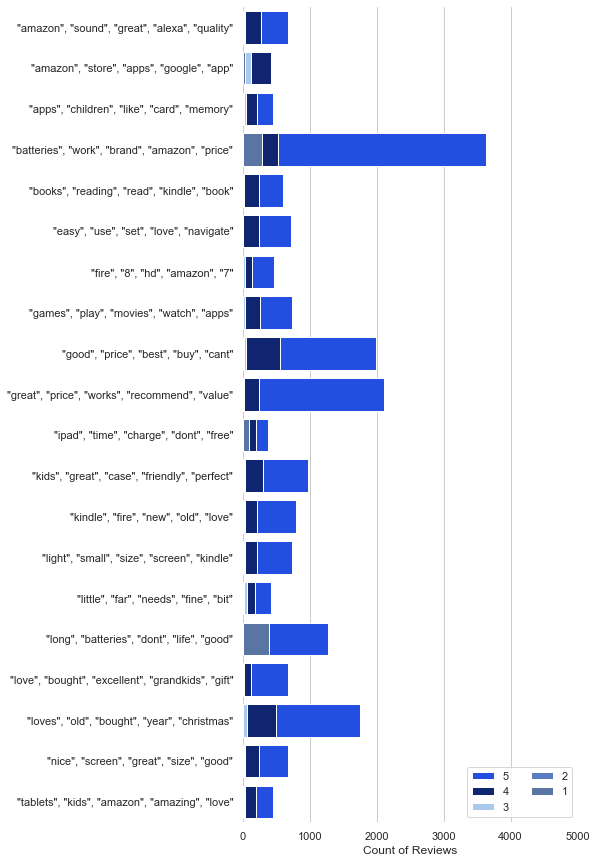

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes('bright')
sns.barplot(x='5', y='primary_topic', data=agg, label="5", color="b")

sns.set_color_codes('dark')
sns.barplot(x='4', y='primary_topic', data=agg, label="4", color="b")

sns.set_color_codes('pastel')
sns.barplot(x='3', y='primary_topic', data=agg, label="3", color="b")

sns.set_color_codes('muted')
sns.barplot(x='2', y='primary_topic', data=agg, label="2", color="b")

sns.set_color_codes('deep')
sns.barplot(x='1', y='primary_topic', data=agg, label="1", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,5000), ylabel="", xlabel="Count of Reviews")
sns.despine(left=True, bottom=True)

1. It seems that batteries that don't have a long lifetime is not rated highly.
2. Most people who do rate, tend to rate highly of good products.
3. Products that are rated poorly don't get that many ratings.

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling